In [1]:
import pandas as pd
from pandasql import sqldf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
results_df = pd.read_csv('results_df.csv')
results_df.loc[results_df['model_name'] == 'extremelyfastdecisiontreeclassifier', 'model_name'] = 'EFDT'
results_df.loc[results_df['model_name'] == 'hoeffdingtreeclassifier', 'model_name'] = 'HT'

In [45]:
results_df.head(5)

,model_name,drift_name,feature_selector_name,learning_threshold,iteration,accuracy,drifts_detected,model_args,ticker
0,HT,adwin,selectkbest,100,1,0.516,0,"grace_period=100, max_depth=4, delta=0.001",AAPL
1,HT,adwin,selectkbest,100,2,0.516,0,"grace_period=100, max_depth=4, delta=0.001",AAPL
2,HT,adwin,selectkbest,100,3,0.516,0,"grace_period=100, max_depth=4, delta=0.001",AAPL
3,HT,adwin,selectkbest,100,4,0.516,0,"grace_period=100, max_depth=4, delta=0.001",AAPL
4,HT,adwin,selectkbest,100,5,0.516,0,"grace_period=100, max_depth=4, delta=0.001",AAPL


In [37]:
sqldf('''

select model_name
from results_df
group by model_name

''')

,model_name
0,EFDT
1,HT
2,mlp
3,randomforest
4,xgboost


### MODELS OVERVIEW

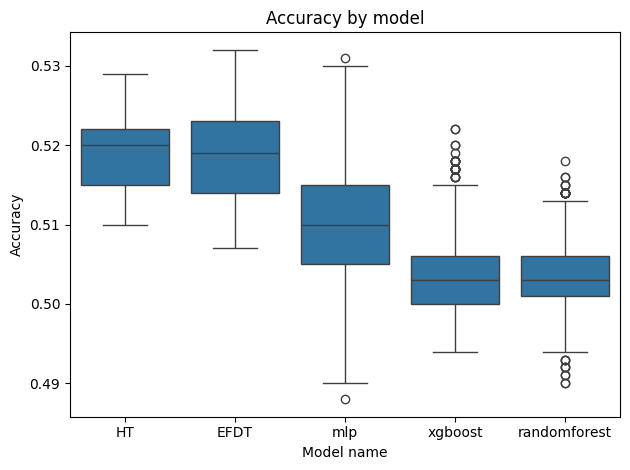

In [43]:
sns.boxplot(x='model_name', y="accuracy", data=results_df)
plt.title("Accuracy by model")
# plt.xticks(rotation=45)
plt.xlabel("Model name")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.savefig('result_df_images_to_report/models_comparison.png')
plt.show()


In [ ]:
results_df.head(2)

,model_name,drift_name,feature_selector_name,learning_threshold,iteration,accuracy,drifts_detected,model_args,ticker
0,HT,adwin,selectkbest,100,1,0.516,0,"grace_period=100, max_depth=4, delta=0.001",AAPL
1,HT,adwin,selectkbest,100,2,0.516,0,"grace_period=100, max_depth=4, delta=0.001",AAPL


In [48]:
def model_overview(model_name):

    
    drift_comparison = sqldf('''

        select model_name, drift_name, avg(drifts_detected), avg(accuracy), max(accuracy)

        from results_df
        where model_name = 'HT'

        group by model_name, drift_name
    ''')

    model_args_comparison = sqldf('''

        select model_name, model_args, avg(accuracy), max(accuracy)

        from results_df
        where model_name = 'HT'

        group by model_name, model_args
    ''')

    display(drift_comparison)
    display(model_args_comparison)

model_overview('HT')

,model_name,drift_name,avg(drifts_detected),avg(accuracy),max(accuracy)
0,HT,adwin,0.200000,0.520800,0.529
1,HT,bollingerband,8.000000,0.519000,0.521
2,HT,dummydriftdetector,33.400000,0.512000,0.514
3,HT,kswin,3.032593,0.522147,0.529
4,HT,pagehinkley,1.400000,0.522800,0.529


,model_name,model_args,avg(accuracy),max(accuracy)
0,HT,"grace_period=100, max_depth=12, delta=0.001",0.519472,0.529
1,HT,"grace_period=100, max_depth=12, delta=1e-05",0.519448,0.529
2,HT,"grace_period=100, max_depth=12, delta=1e-07",0.519304,0.529
3,HT,"grace_period=100, max_depth=4, delta=0.001",0.519376,0.529
4,HT,"grace_period=100, max_depth=4, delta=1e-05",0.519392,0.529
5,HT,"grace_period=100, max_depth=4, delta=1e-07",0.519368,0.529
6,HT,"grace_period=100, max_depth=8, delta=0.001",0.519408,0.529
7,HT,"grace_period=100, max_depth=8, delta=1e-05",0.519264,0.529
8,HT,"grace_period=100, max_depth=8, delta=1e-07",0.519264,0.529
9,HT,"grace_period=200, max_depth=12, delta=0.001",0.519344,0.529


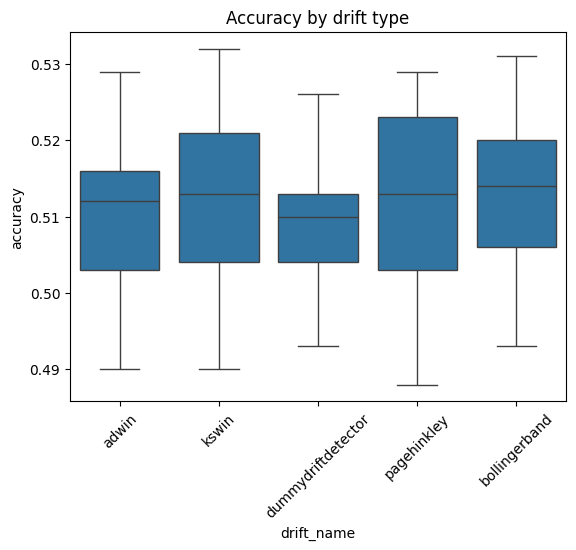

In [44]:
sns.boxplot(x='drift_name', y="accuracy", data=results_df)
plt.title("Accuracy by drift type")
plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()

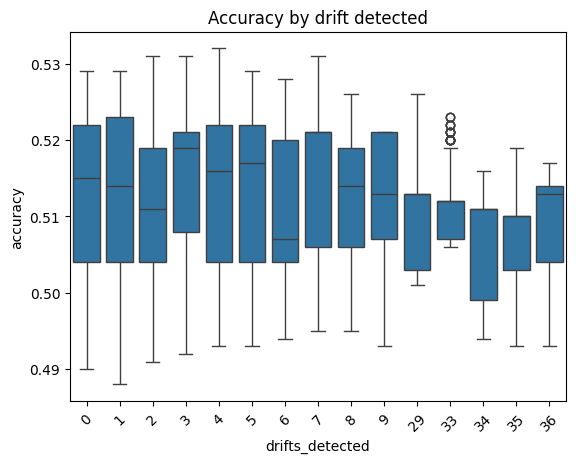

In [25]:
sns.boxplot(x='drifts_detected', y="accuracy", data=results_df)
plt.title("Accuracy by drift detected")
plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()